# VAEs in 2D
## Part A


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset

%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
import numpy as np

def sample_data_1():
    count = 100000
    rand = np.random.RandomState(0)
    return [[1.0, 2.0]] + rand.randn(count, 2) * [[5.0, 1.0]]


def sample_data_2():
    count = 100000
    rand = np.random.RandomState(0)
    return [[1.0, 2.0]] + (rand.randn(count, 2) * [[5.0, 1.0]]).dot(
        [[np.sqrt(2) / 2, np.sqrt(2) / 2], [-np.sqrt(2) / 2, np.sqrt(2) / 2]])

In [3]:
data1 = sample_data_1()
data2 = sample_data_2()

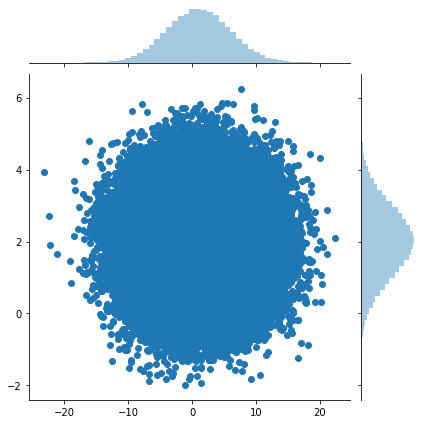

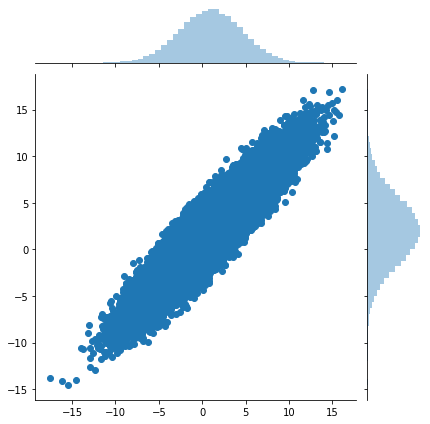

In [4]:
# visualize data
sns.jointplot(data1[:, 0], data1[:, 1])
sns.jointplot(data2[:, 0], data2[:, 1])


In [17]:
from vae import VAEtypeA
# quick training
train_loader = DataLoader(TensorDataset(torch.tensor(data1)), batch_size=100, shuffle=True)
my_vae = VAEtypeA()
opt = torch.optim.Adam(my_vae.parameters())
device = 'cuda:0'

my_vae.to(device)
n_epochs = 5
for epoch_idx in range(n_epochs):
    for x in train_loader:
        opt.zero_grad()
        x = x[0].to(device=device, dtype=torch.float32)
        loss, kl, rec = my_vae(x)
        loss.backward()
        
        opt.step()
    print('Loss: ' + str(loss.item()))
        


Loss: 4.791298866271973
Loss: 4.520665645599365
Loss: 4.548081398010254
Loss: 4.614692211151123
Loss: 4.21229362487793


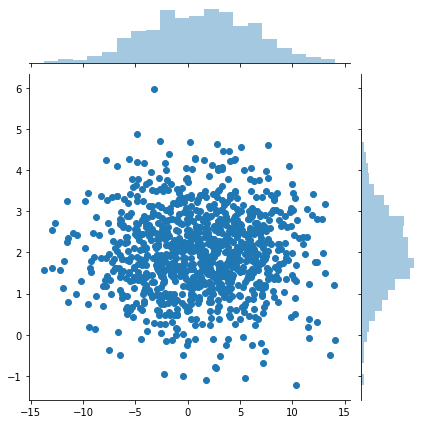

In [23]:
samples = my_vae.sample_x(1000).detach().cpu()
sns.jointplot(samples[:, 0], samples[:, 1])
# samples.dtype

## Part B


In [6]:
def sample_data_3():
    count = 100000
    rand = np.random.RandomState(0)
    a = [[-1.5, 2.5]] + rand.randn(count // 3, 2) * 0.2
    b = [[1.5, 2.5]] + rand.randn(count // 3, 2) * 0.2
    c = np.c_[2 * np.cos(np.linspace(0, np.pi, count // 3)),
    -np.sin(np.linspace(0, np.pi, count // 3))]
    c += rand.randn(*c.shape) * 0.2
    data_x = np.concatenate([a, b, c], axis=0)
    data_y = np.array([0] * len(a) + [1] * len(b) + [2] * len(c))
    perm = rand.permutation(len(data_x))
    return data_x[perm], data_y[perm]